# Exploratory Data Analysis (EDA) for GlobalMart Supermarket Sales Data

- by Muhammad Ejaz
- Date: 27-10-2025

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset and check data
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Order_ID,Order_Date,Region,Country,Sales_Rep,Team,Customer_ID,Customer_Segment,Product_Category,Product_Name,Stage,Units_Sold,Revenue,Target,Deal_Size
0,4971,2021-01-01,North,USA,David Lee,Team C,C3971,Corporate,Furniture,Office Chair,Won,6,1662,1447,1665
1,2347,2021-01-02,South,Brazil,Alice Johnson,Team B,C1347,SME,Appliances,Microwave Max,Opportunity,2,464,875,928
2,2588,2021-01-02,South,Brazil,Maria Garcia,Team C,C1588,Retail,Appliances,Refrigerator,Opportunity,5,132,277,264
3,5092,2021-01-02,East,China,Priya Sharma,Team B,C4092,Retail,Appliances,Microwave Max,Opportunity,5,610,1080,1220
4,1182,2021-01-02,North,Canada,David Lee,Team A,C0182,Retail,Electronics,Smartphone Z,Lost,0,0,854,0


In [3]:
# checking Data types and Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          5000 non-null   int64 
 1   Order_Date        5000 non-null   object
 2   Region            5000 non-null   object
 3   Country           5000 non-null   object
 4   Sales_Rep         5000 non-null   object
 5   Team              5000 non-null   object
 6   Customer_ID       5000 non-null   object
 7   Customer_Segment  5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Product_Name      5000 non-null   object
 10  Stage             5000 non-null   object
 11  Units_Sold        5000 non-null   int64 
 12  Revenue           5000 non-null   int64 
 13  Target            5000 non-null   int64 
 14  Deal_Size         5000 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 586.1+ KB


In [4]:
# checking for type of columns
df.dtypes

Order_ID             int64
Order_Date          object
Region              object
Country             object
Sales_Rep           object
Team                object
Customer_ID         object
Customer_Segment    object
Product_Category    object
Product_Name        object
Stage               object
Units_Sold           int64
Revenue              int64
Target               int64
Deal_Size            int64
dtype: object

In [5]:
# finding null values

df.isnull().sum()


Order_ID            0
Order_Date          0
Region              0
Country             0
Sales_Rep           0
Team                0
Customer_ID         0
Customer_Segment    0
Product_Category    0
Product_Name        0
Stage               0
Units_Sold          0
Revenue             0
Target              0
Deal_Size           0
dtype: int64

In [6]:
# check duplicate rows
df.duplicated().sum()

np.int64(0)

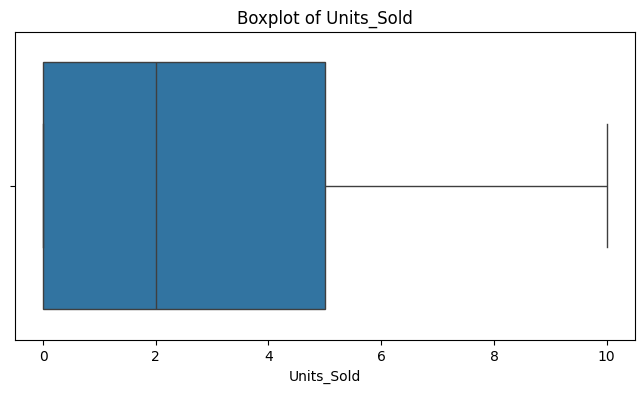

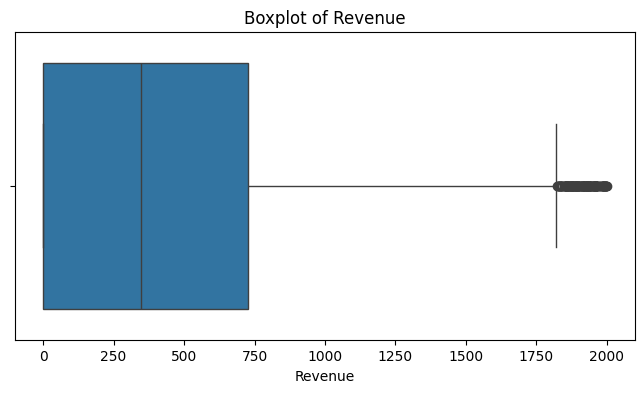

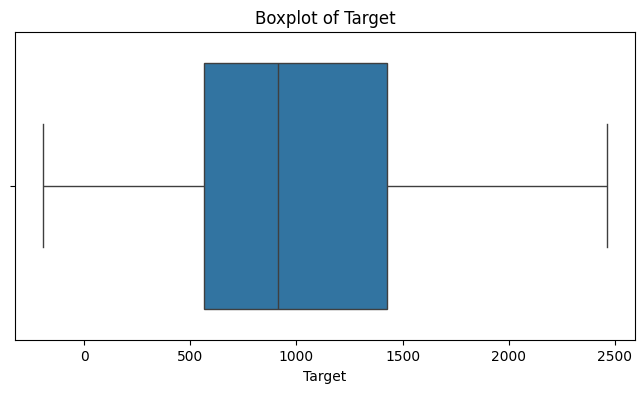

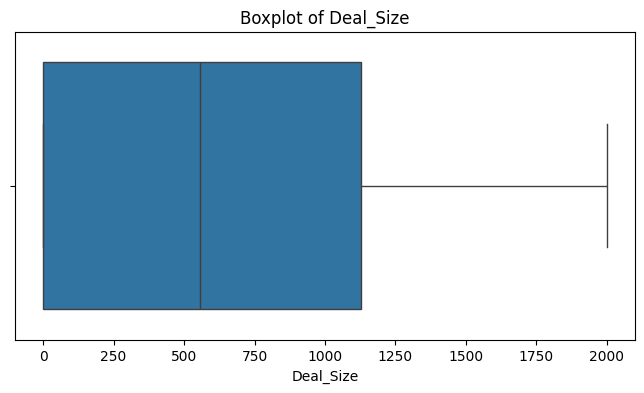

In [14]:
#checking outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()[1:] 

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.savefig(f'boxplot_{col}.png')
    plt.show()  

    

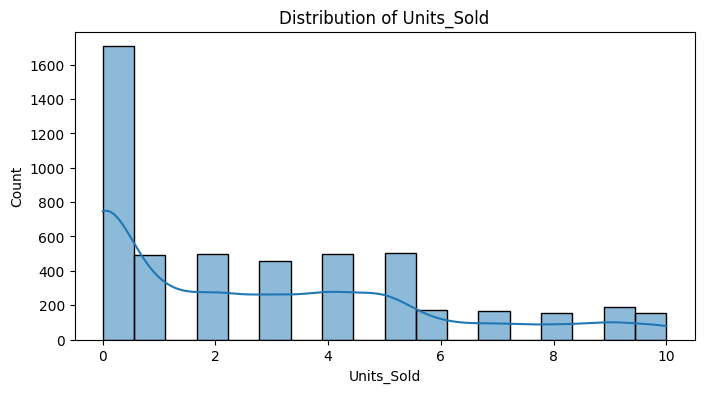

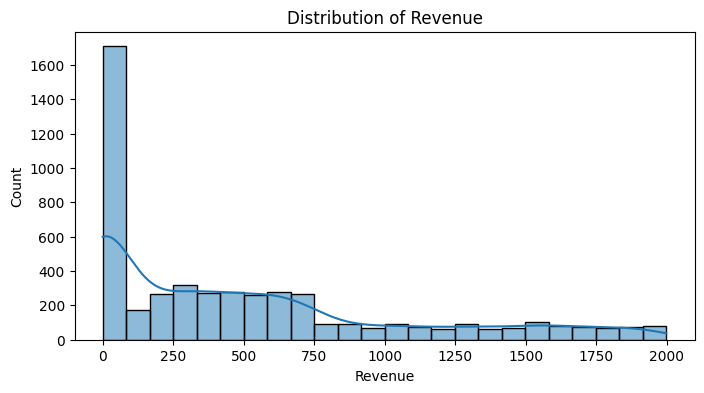

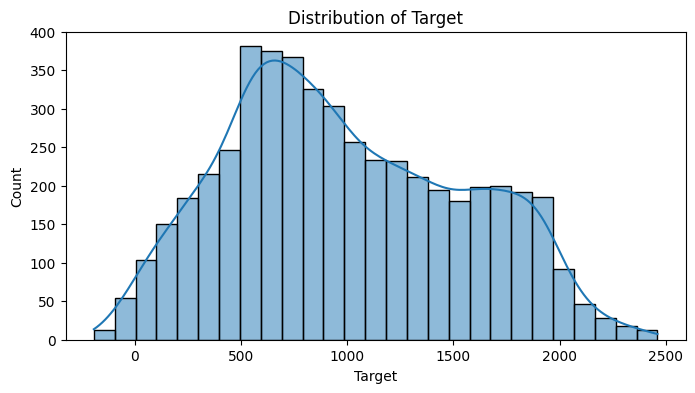

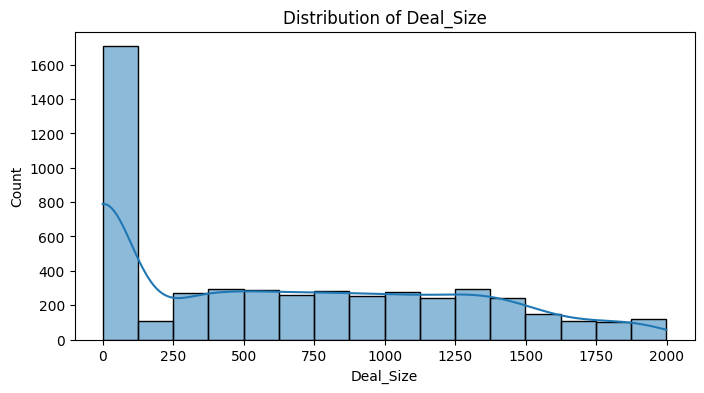

In [15]:
# Visualizing distributions of numerical features
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'distribution_{col}.png')
    plt.show()  

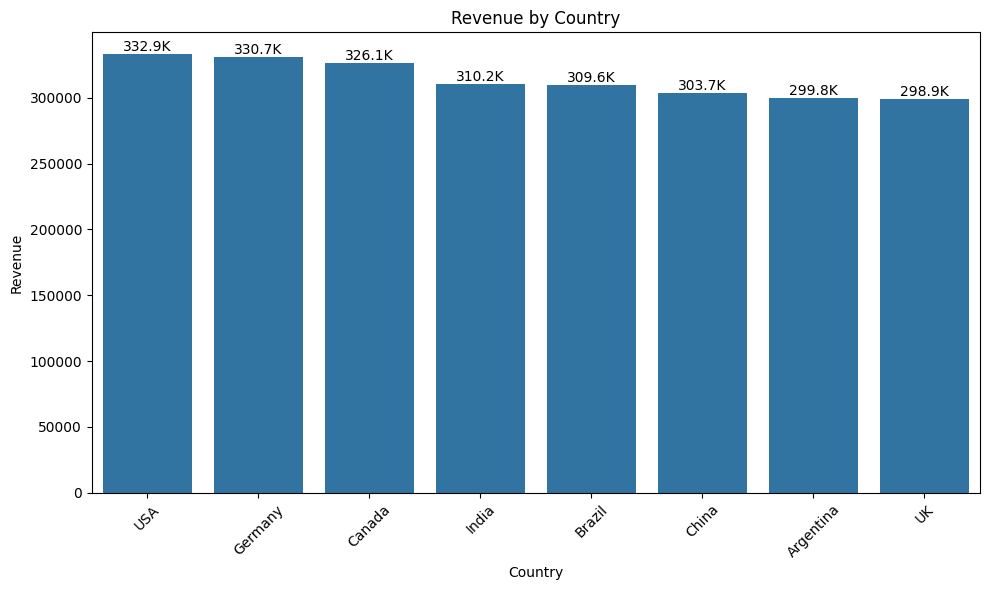

In [16]:


# Aggregate revenue by country and sort descending
country_revenue = df.groupby('Country', as_index=False)['Revenue'].sum()
country_revenue = country_revenue.sort_values('Revenue', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=country_revenue, x='Country', y='Revenue')

# Add revenue labels in K
for p in ax.patches:
    revenue_k = p.get_height() / 1000  # convert to K
    ax.text(
        p.get_x() + p.get_width()/2,  # center of the bar
        p.get_height(),               # top of the bar
        f'{revenue_k:.1f}K',         # label
        ha='center', va='bottom'
    )

plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_by_country.png')
plt.show()


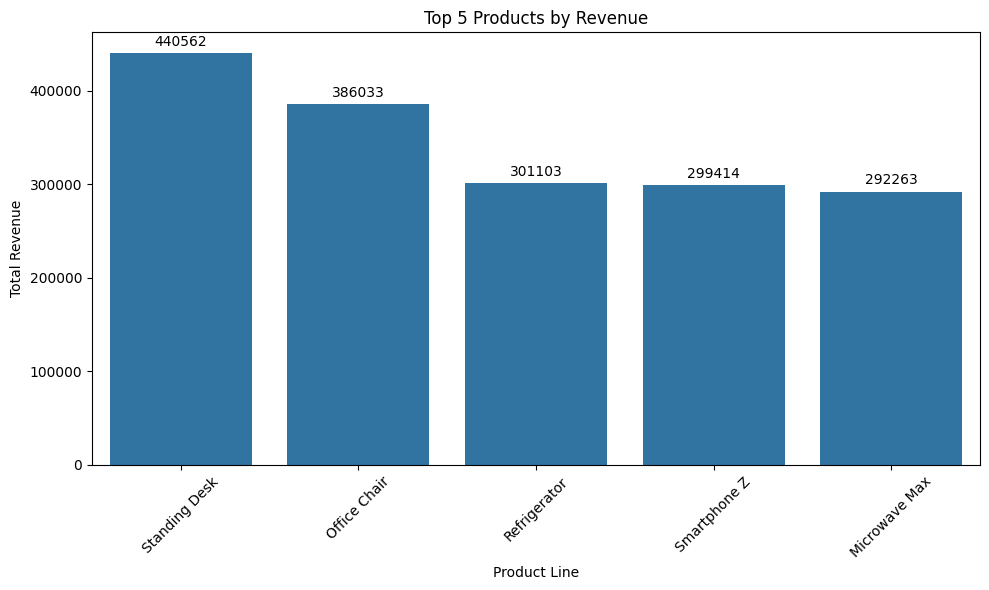

In [17]:

# top 5 products by Product_Name with revenue with labels

top_products = df.groupby('Product_Name')['Revenue'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_products, x='Product_Name', y='Revenue')
# Add revenue labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_5_products_by_revenue.png')
plt.show()


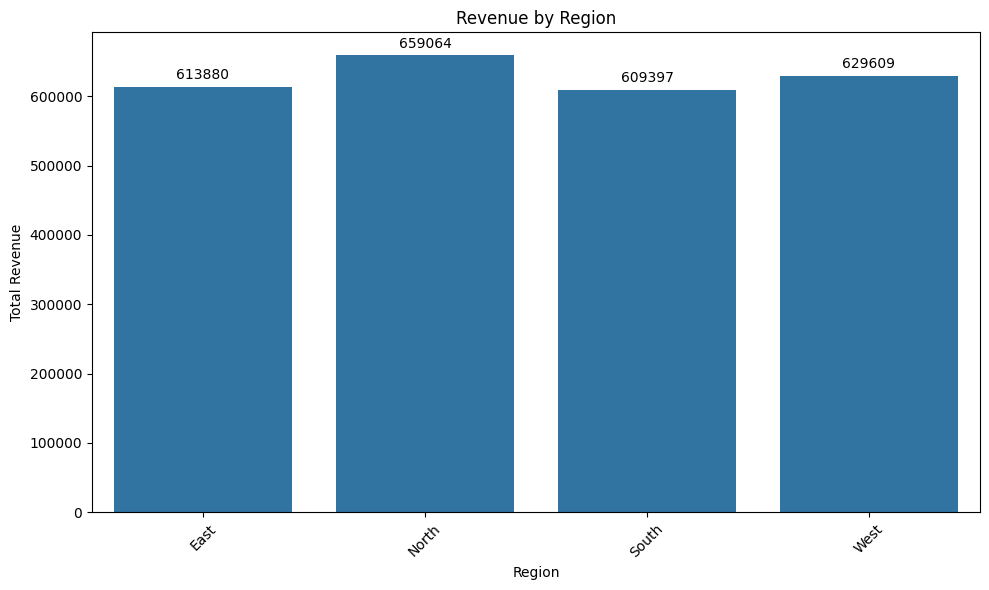

In [18]:
# revenue by region with labels
region_revenue = df.groupby('Region', as_index=False)['Revenue'].sum()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=region_revenue, x='Region', y='Revenue')
# Add revenue labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('revenue_by_region.png')
plt.show()


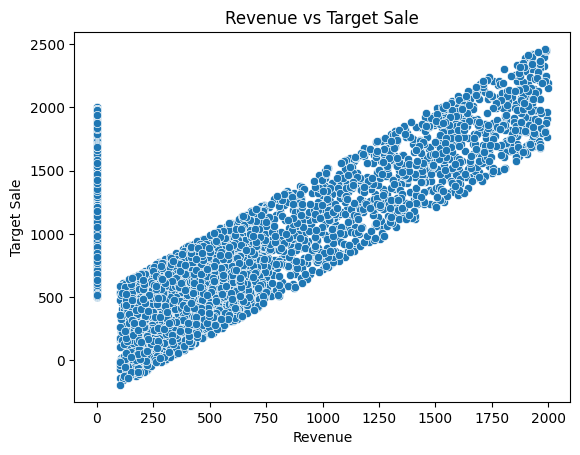

In [19]:
# scatter plot for revenue vs target sale
sns.scatterplot(data=df, x='Revenue', y='Target')
plt.title('Revenue vs Target Sale')
plt.xlabel('Revenue')
plt.ylabel('Target Sale')
plt.savefig('revenue_vs_target_sale.png')
plt.show()
 

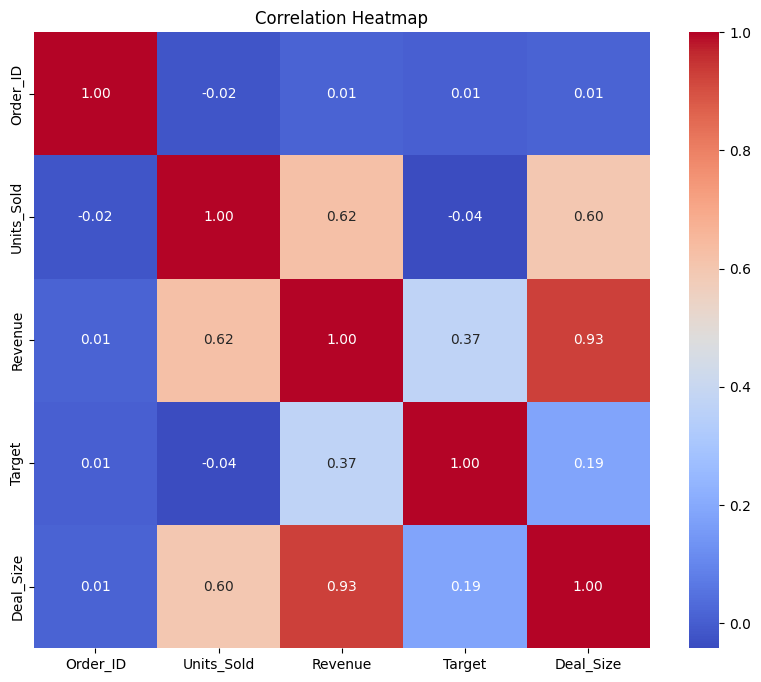

In [20]:

plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()
